<a href="https://colab.research.google.com/github/spykeshivam/pytorch_cnn/blob/main/CNN_bird.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F # helps us move our data forward in the network
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
class Model(nn.Module):
  def __init__(self,in_features=4,h1=8,h2=9,out_features=3):
    super().__init__()
    # input layer (4 inputs)
    # h1
    self.fc1=nn.Linear(in_features,h1)
    # h2
    self.fc2=nn.Linear(h1,h2)
    # output layer (3 claasses)
    self.out=nn.Linear(h2,out_features)

  def forward(self,x):
    x=F.relu(self.fc1(x))
    x=F.relu(self.fc2(x))
    x=F.relu(self.out(x))
    return x



In [ ]:
torch.manual_seed(41)


In [ ]:
model=Model()

In [ ]:
url='https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
df=pd.read_csv(url)

In [ ]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
df['species']=df['species'].replace('setosa',0.0)
df['species']=df['species'].replace('versicolor',1.0)
df['species']=df['species'].replace('virginica',2.0)
df

<ipython-input-79-55b696cc4903>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['species']=df['species'].replace('virginica',2.0)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [ ]:
X=df.drop(columns='species')
y=df['species']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=41)
X_train=torch.FloatTensor(X_train.values)
X_test=torch.FloatTensor(X_test.values)


In [ ]:
# Convert y to integer tensor
y_train=torch.LongTensor(y_train.values)
y_test=torch.LongTensor(y_test.values)

In [ ]:
Criterion=nn.CrossEntropyLoss()

In [ ]:
Optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [ ]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

In [ ]:
#epochs
epochs=100
losses=[]
for i in range(epochs):
  y_pred=model.forward(X_train)
  loss=Criterion(y_pred,y_train)
  losses.append(loss.detach().numpy())
  if i%10==0:
    print(f'epoch: {i} loss: {loss}')
  Optimizer.zero_grad() #clears the gradients of all the parameters.
  loss.backward() #calculates the gradients of the loss function with respect to all the model's parameters.
  Optimizer.step() #updates the model's parameters based on the calculated gradients.

epoch: 0 loss: 1.1251550912857056
epoch: 10 loss: 1.0096259117126465
epoch: 20 loss: 0.8512223958969116
epoch: 30 loss: 0.654869019985199
epoch: 40 loss: 0.4490566551685333
epoch: 50 loss: 0.2707386612892151
epoch: 60 loss: 0.15461841225624084
epoch: 70 loss: 0.09299226105213165
epoch: 80 loss: 0.06447025388479233
epoch: 90 loss: 0.050585027784109116


In [ ]:
loss

tensor(0.0434, grad_fn=<NllLossBackward0>)

Text(0.5, 0, 'Epochs')

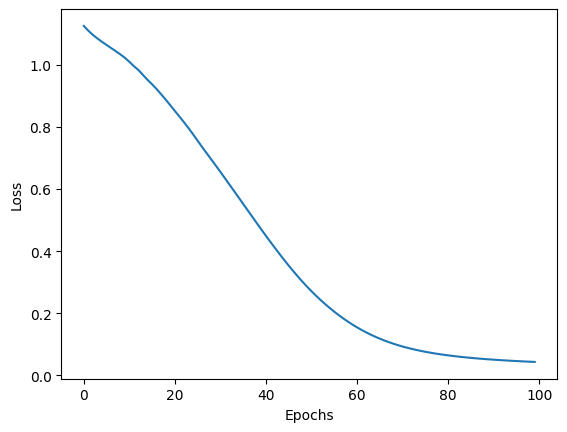

In [ ]:
plt.plot(range(epochs),losses)
plt.ylabel('Loss')
plt.xlabel('Epochs')

In [ ]:
with torch.no_grad():
  y_eval=model.forward(X_test)
  loss=Criterion(y_eval,y_test)

In [ ]:
loss

tensor(0.1296)

In [ ]:
correct=0
with torch.no_grad():
  for i,data in enumerate(X_test):
    y_val=model.forward(data)
    print(f'{i+1}.) {str(y_val)}\t{y_test[i]}')
    if y_val.argmax().item()==y_test[i]:
      correct+=1
  print(correct/len(y_test))

1.) tensor([0.0000, 7.4818, 9.9517])	2
2.) tensor([ 0.0000,  7.7416, 14.4150])	2
3.) tensor([ 0.0000,  9.1741, 15.2260])	2
4.) tensor([0.2420, 8.3711, 4.5725])	1
5.) tensor([ 0.0000,  8.4455, 12.5213])	2
6.) tensor([1.6580, 8.0895, 2.0248])	1
7.) tensor([0.0000, 8.1067, 9.3146])	2
8.) tensor([0.3616, 8.4538, 4.3424])	1
9.) tensor([ 0.0000,  8.2779, 10.8831])	2
10.) tensor([ 0.0000,  8.2340, 15.2944])	2
11.) tensor([0.0000, 8.0207, 8.7722])	2
12.) tensor([9.0044, 3.5022, 0.0000])	0
13.) tensor([8.0835, 3.2078, 0.0000])	0
14.) tensor([2.2655, 6.5108, 0.4715])	1
15.) tensor([8.0545, 3.9531, 0.0000])	0
16.) tensor([0.0000, 8.1667, 8.0483])	2
17.) tensor([8.3930, 3.3382, 0.0000])	0
18.) tensor([0.0000, 7.6729, 9.5912])	1
19.) tensor([8.6390, 3.3854, 0.0000])	0
20.) tensor([7.5293, 3.3366, 0.0000])	0
21.) tensor([2.0055, 7.1311, 1.1164])	1
22.) tensor([ 0.0000,  8.4883, 14.0726])	2
23.) tensor([8.1567, 3.8903, 0.0000])	0
24.) tensor([8.5490, 3.3566, 0.0000])	0
25.) tensor([2.2127, 7.3726, 0.

In [ ]:
correct

28

In [ ]:
new_iris=torch.tensor([5.6,3.7,2.2,1.5])

In [ ]:
with torch.no_grad():
    y_val=model.forward(new_iris)

In [ ]:
y_val.argmax().item()

1

In [ ]:
torch.save(model,'iris_model.pt')

In [ ]:
new_model=torch.load('iris_model.pt')

<ipython-input-104-707dd9f76205>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  new_model=torch.load('iris_model.pt')


In [ ]:
correct=0
with torch.no_grad():
  for i,data in enumerate(X_test):
    y_val=new_model.forward(data)
    print(f'{i+1}.) {str(y_val)}\t{y_test[i]}')
    if y_val.argmax().item()==y_test[i]:
      correct+=1
  print(correct/len(y_test))

1.) tensor([0.0000, 7.4818, 9.9517])	2
2.) tensor([ 0.0000,  7.7416, 14.4150])	2
3.) tensor([ 0.0000,  9.1741, 15.2260])	2
4.) tensor([0.2420, 8.3711, 4.5725])	1
5.) tensor([ 0.0000,  8.4455, 12.5213])	2
6.) tensor([1.6580, 8.0895, 2.0248])	1
7.) tensor([0.0000, 8.1067, 9.3146])	2
8.) tensor([0.3616, 8.4538, 4.3424])	1
9.) tensor([ 0.0000,  8.2779, 10.8831])	2
10.) tensor([ 0.0000,  8.2340, 15.2944])	2
11.) tensor([0.0000, 8.0207, 8.7722])	2
12.) tensor([9.0044, 3.5022, 0.0000])	0
13.) tensor([8.0835, 3.2078, 0.0000])	0
14.) tensor([2.2655, 6.5108, 0.4715])	1
15.) tensor([8.0545, 3.9531, 0.0000])	0
16.) tensor([0.0000, 8.1667, 8.0483])	2
17.) tensor([8.3930, 3.3382, 0.0000])	0
18.) tensor([0.0000, 7.6729, 9.5912])	1
19.) tensor([8.6390, 3.3854, 0.0000])	0
20.) tensor([7.5293, 3.3366, 0.0000])	0
21.) tensor([2.0055, 7.1311, 1.1164])	1
22.) tensor([ 0.0000,  8.4883, 14.0726])	2
23.) tensor([8.1567, 3.8903, 0.0000])	0
24.) tensor([8.5490, 3.3566, 0.0000])	0
25.) tensor([2.2127, 7.3726, 0.

In [ ]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)